In [2]:
import os
import numpy as np
import pandas as pd

from statistics import mean

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler



from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score


import matplotlib.pyplot as plt
import seaborn as sns

import pickle

In [3]:
x1 = pd.read_csv('D:\\Abhimanyu Singh\\2 knn experiement\\feature_vectors\\cbc\\feature_vector_algo_1.csv')
x2 = pd.read_csv('D:\\Abhimanyu Singh\\2 knn experiement\\feature_vectors\\cbc\\feature_vector_algo_2.csv')
x3 = pd.read_csv('D:\\Abhimanyu Singh\\2 knn experiement\\feature_vectors\\cbc\\feature_vector_algo_3.csv')
x4 = pd.read_csv('D:\\Abhimanyu Singh\\2 knn experiement\\feature_vectors\\cbc\\feature_vector_algo_4.csv')
x5 = pd.read_csv('D:\\Abhimanyu Singh\\2 knn experiement\\feature_vectors\\cbc\\feature_vector_algo_5.csv')
x6 = pd.read_csv('D:\\Abhimanyu Singh\\2 knn experiement\\feature_vectors\\cbc\\feature_vector_algo_6.csv')
x7 = pd.read_csv('D:\\Abhimanyu Singh\\2 knn experiement\\feature_vectors\\cbc\\feature_vector_algo_7.csv')
x8 = pd.read_csv('D:\\Abhimanyu Singh\\2 knn experiement\\feature_vectors\\cbc\\feature_vector_algo_8.csv')

print(x1.shape)
x1 = x1.iloc[:,1:]
x2 = x2.iloc[:,1:]
x3 = x3.iloc[:,1:]
x4 = x4.iloc[:,1:]
x5 = x5.iloc[:,1:]
x6 = x6.iloc[:,1:]
x7 = x7.iloc[:,1:]
x8 = x8.iloc[:,1:]

print(x1.shape)

(1001, 2049)
(1001, 2048)


In [4]:
x1_type2 = pd.read_csv('D:\\Abhimanyu Singh\\2 knn experiement\\feature_vectors_type_2\\cbc\\feature_vector_algo_1.csv')
x2_type2 = pd.read_csv('D:\\Abhimanyu Singh\\2 knn experiement\\feature_vectors_type_2\\cbc\\feature_vector_algo_2.csv')
x3_type2 = pd.read_csv('D:\\Abhimanyu Singh\\2 knn experiement\\feature_vectors_type_2\\cbc\\feature_vector_algo_3.csv')
x4_type2 = pd.read_csv('D:\\Abhimanyu Singh\\2 knn experiement\\feature_vectors_type_2\\cbc\\feature_vector_algo_4.csv')
x5_type2 = pd.read_csv('D:\\Abhimanyu Singh\\2 knn experiement\\feature_vectors_type_2\\cbc\\feature_vector_algo_5.csv')
x6_type2 = pd.read_csv('D:\\Abhimanyu Singh\\2 knn experiement\\feature_vectors_type_2\\cbc\\feature_vector_algo_6.csv')
x7_type2 = pd.read_csv('D:\\Abhimanyu Singh\\2 knn experiement\\feature_vectors_type_2\\cbc\\feature_vector_algo_7.csv')
x8_type2 = pd.read_csv('D:\\Abhimanyu Singh\\2 knn experiement\\feature_vectors_type_2\\cbc\\feature_vector_algo_8.csv')

print(x1_type2.shape)

x1_type2 = x1_type2.iloc[:,1:]
x2_type2 = x2_type2.iloc[:,1:]
x3_type2 = x3_type2.iloc[:,1:]
x4_type2 = x4_type2.iloc[:,1:]
x5_type2 = x5_type2.iloc[:,1:]
x6_type2 = x6_type2.iloc[:,1:]
x7_type2 = x7_type2.iloc[:,1:]
x8_type2 = x8_type2.iloc[:,1:]

print(x1_type2.shape)

(1001, 2049)
(1001, 2048)


In [5]:
x1 = pd.concat([x1, x1_type2], axis = 1)
x2 = pd.concat([x2, x2_type2], axis = 1)
x3 = pd.concat([x3, x3_type2], axis = 1)
x4 = pd.concat([x4, x4_type2], axis = 1)
x5 = pd.concat([x5, x5_type2], axis = 1)
x6 = pd.concat([x6, x6_type2], axis = 1)
x7 = pd.concat([x7, x7_type2], axis = 1)
x8 = pd.concat([x8, x8_type2], axis = 1)

print(x1.shape)

(1001, 4096)


In [6]:
X = x1
X = pd.concat([X, x2], axis = 0)
X = pd.concat([X, x3], axis = 0)
X = pd.concat([X, x4], axis = 0)
X = pd.concat([X, x5], axis = 0)
X = pd.concat([X, x6], axis = 0)
X = pd.concat([X, x7], axis = 0)
X = pd.concat([X, x8], axis = 0)



df = (X)
print(df.iloc[:,2040])


0       245
1       252
2       276
3       236
4       253
       ... 
996     258
997     248
998     254
999     262
1000    277
Name: 2040, Length: 8008, dtype: int64


In [7]:
df = pd.DataFrame(X)

#target_df = pd.DataFrame(Y.T)
print(df.head)

#print(target_df.shape, target_df.head())

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
df = scaled_data
print(df.shape)
print(df[1])

<bound method NDFrame.head of         0    1    2    3    4    5    6    7    8    9  ...  2038  2039  2040  \
0     259  246  248  276  247  247  254  256  222  250  ...   262   248   232   
1     279  258  258  247  251  280  226  265  240  266  ...   267   264   271   
2     261  309  256  253  248  257  232  267  245  268  ...   264   258   238   
3     242  278  206  298  261  248  268  253  240  265  ...   263   233   272   
4     245  258  230  246  267  262  261  267  251  272  ...   245   250   242   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...   ...   
996   249  254  240  239  283  233  258  272  247  246  ...   248   252   254   
997   265  258  253  234  240  262  257  225  262  252  ...   246   272   259   
998   239  276  261  277  256  274  279  273  253  277  ...   278   256   248   
999   257  244  267  261  248  231  275  260  265  215  ...   269   265   264   
1000  237  249  248  261  241  250  236  282  240  257  ...   271   275   259  

In [8]:
y1 = np.full((1001,),1)
y2 = np.full((1001,),2)
y3 = np.full((1001,),3)
y4 = np.full((1001,),4)
y5 = np.full((1001,),5)
y6 = np.full((1001,),6)
y7 = np.full((1001,),7)
y8 = np.full((1001,),8)

Y = np.concatenate((y1, y2, y3, y4, y5, y6, y7, y8), axis = 0)
print(Y.shape)


(8008,)


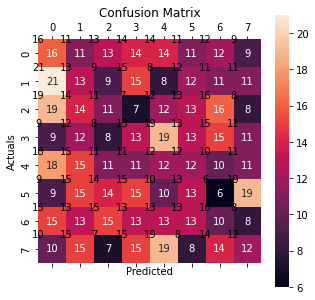

parameters are  {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 150, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
Accuracy : 0.125
precision : 0.125
recall : 0.125
F1 Score : 0.125


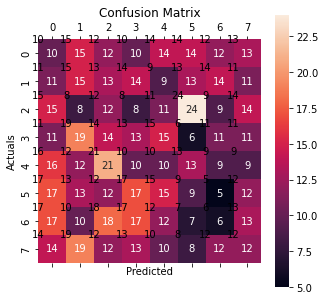

parameters are  {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 150, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
Accuracy : 0.109
precision : 0.109
recall : 0.109
F1 Score : 0.109


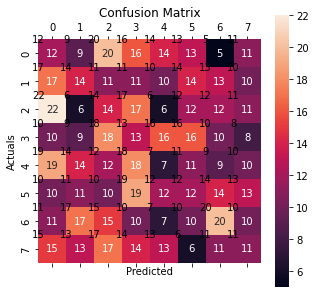

parameters are  {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 150, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
Accuracy : 0.129
precision : 0.129
recall : 0.129
F1 Score : 0.129


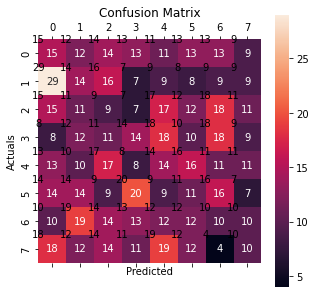

parameters are  {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 150, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
Accuracy : 0.121
precision : 0.121
recall : 0.121
F1 Score : 0.121


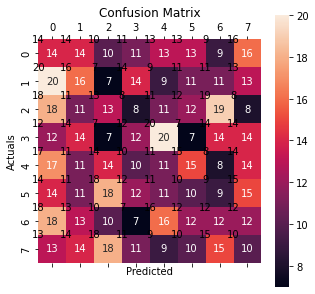

parameters are  {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 150, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
Accuracy : 0.122
precision : 0.122
recall : 0.122
F1 Score : 0.122


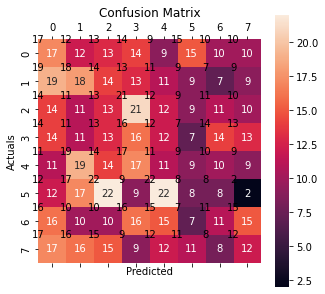

parameters are  {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 150, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
Accuracy : 0.132
precision : 0.132
recall : 0.132
F1 Score : 0.132


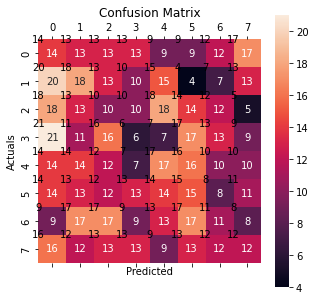

parameters are  {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 150, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
Accuracy : 0.129
precision : 0.129
recall : 0.129
F1 Score : 0.129


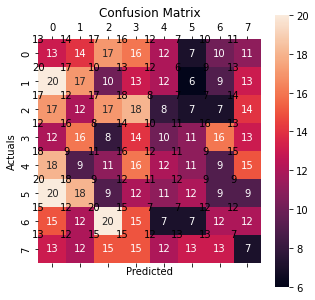

parameters are  {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 150, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
Accuracy : 0.130
precision : 0.130
recall : 0.130
F1 Score : 0.130


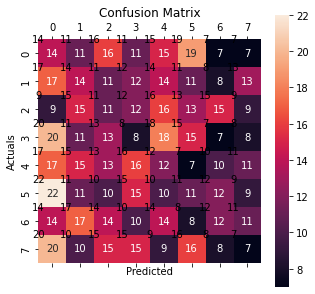

parameters are  {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 150, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
Accuracy : 0.111
precision : 0.111
recall : 0.111
F1 Score : 0.111


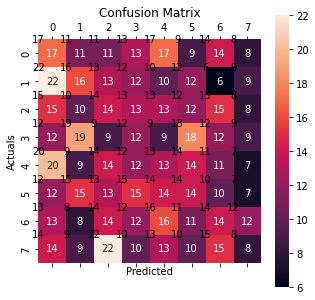

parameters are  {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 150, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
Accuracy : 0.135
precision : 0.135
recall : 0.135
F1 Score : 0.135
0.12421972534332085


In [9]:
sss = StratifiedShuffleSplit(n_splits=10, test_size = 0.1, random_state = None)
tree_parameters = []
counter = 0
accuracy_score = []
for train_index, test_index in sss.split(df, Y) :
    counter += 1
    #print(train_index,test_index)
    X_train, X_test = df[train_index,:], df[test_index,:]
    Y_train, Y_test = Y[train_index], Y[test_index]
    #print(X_train.shape, Y_train.shape)
    randf_classifier = RandomForestClassifier(n_estimators = 150)
    randf_classifier.fit(X_train,Y_train)
    
    
    
    y_test_predicted = randf_classifier.predict(X_test)
    conf_matrix = confusion_matrix(Y_test, y_test_predicted)
    fig, ax = plt.subplots(figsize= (5,5))
    ax.matshow(conf_matrix, cmap = plt.cm.Oranges, alpha = 0.3)
    for i in range(conf_matrix.shape[0]) :
        for j in range(conf_matrix.shape[1]) :
            ax.text(x =j, y = i, s = conf_matrix[i, j], va ='center', ha = 'center')
    sns.heatmap(conf_matrix, annot = True)
    plt.xlabel('Predicted')
    plt.ylabel('Actuals')
    plt.title('Confusion Matrix')
    plt.show()
    
    parameters = randf_classifier.get_params(deep=True)
    tree_parameters.append(parameters)
    print('parameters are ', parameters)
    print('Accuracy : %0.3f' % randf_classifier.score(X_test,Y_test))
    print('precision : %0.3f' % precision_score(Y_test, y_test_predicted, average='micro'))
    print('recall : %0.3f' % recall_score(Y_test, y_test_predicted, average='micro'))
    print('F1 Score : %0.3f' % f1_score(Y_test, y_test_predicted, average='micro'))
    
    
    
    accuracy_score.append(randf_classifier.score(X_test,Y_test))

    
    filename = 'D:\\Abhimanyu Singh\\2 knn experiement\\models\\combined\\cbc\\random_forest\\classifier'+ str(counter) +'.sav'
    pickle.dump(randf_classifier, open(filename, 'wb'))

print(mean(accuracy_score))  

Learning rate set to 0.5
0:	learn: 2.0707663	total: 824ms	remaining: 1m 5s
1:	learn: 2.0610566	total: 1.55s	remaining: 1m
2:	learn: 2.0507692	total: 2.29s	remaining: 58.7s
3:	learn: 2.0351702	total: 3.09s	remaining: 58.6s
4:	learn: 2.0231434	total: 3.82s	remaining: 57.3s
5:	learn: 2.0117344	total: 4.58s	remaining: 56.5s
6:	learn: 2.0032080	total: 5.34s	remaining: 55.7s
7:	learn: 1.9939552	total: 6.09s	remaining: 54.8s
8:	learn: 1.9818892	total: 6.85s	remaining: 54.1s
9:	learn: 1.9666750	total: 7.62s	remaining: 53.4s
10:	learn: 1.9549909	total: 8.37s	remaining: 52.5s
11:	learn: 1.9478738	total: 9.09s	remaining: 51.5s
12:	learn: 1.9371648	total: 9.85s	remaining: 50.7s
13:	learn: 1.9262962	total: 10.6s	remaining: 50.1s
14:	learn: 1.9124514	total: 11.4s	remaining: 49.4s
15:	learn: 1.8989583	total: 12.2s	remaining: 48.7s
16:	learn: 1.8864846	total: 13s	remaining: 48s
17:	learn: 1.8744304	total: 13.7s	remaining: 47.2s
18:	learn: 1.8660581	total: 14.5s	remaining: 46.4s
19:	learn: 1.8553310	to

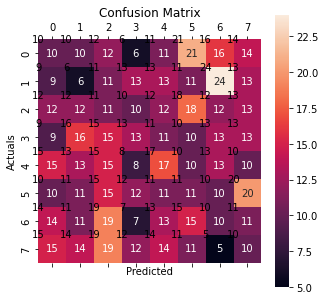


 test accuracy of the model 0.10986267166042447

 train accuracy of the model 0.6232829193839323
Learning rate set to 0.5
0:	learn: 2.0721874	total: 826ms	remaining: 1m 5s
1:	learn: 2.0655433	total: 1.57s	remaining: 1m 1s
2:	learn: 2.0550723	total: 2.33s	remaining: 59.9s
3:	learn: 2.0397048	total: 3.1s	remaining: 58.9s
4:	learn: 2.0289207	total: 3.84s	remaining: 57.6s
5:	learn: 2.0114613	total: 4.61s	remaining: 56.9s
6:	learn: 1.9966554	total: 5.39s	remaining: 56.2s
7:	learn: 1.9898199	total: 6.13s	remaining: 55.2s
8:	learn: 1.9807101	total: 6.9s	remaining: 54.4s
9:	learn: 1.9662247	total: 7.67s	remaining: 53.7s
10:	learn: 1.9608729	total: 8.39s	remaining: 52.6s
11:	learn: 1.9583398	total: 9.08s	remaining: 51.4s
12:	learn: 1.9484327	total: 9.82s	remaining: 50.6s
13:	learn: 1.9372619	total: 10.6s	remaining: 49.9s
14:	learn: 1.9260607	total: 11.3s	remaining: 49.1s
15:	learn: 1.9186686	total: 12.1s	remaining: 48.5s
16:	learn: 1.9035879	total: 12.9s	remaining: 47.8s
17:	learn: 1.8948984	t

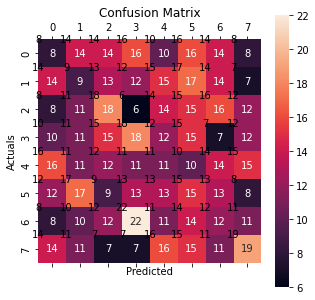


 test accuracy of the model 0.1373283395755306

 train accuracy of the model 0.6185652837519079
Learning rate set to 0.5
0:	learn: 2.0708721	total: 871ms	remaining: 1m 8s
1:	learn: 2.0615307	total: 1.6s	remaining: 1m 2s
2:	learn: 2.0470316	total: 2.4s	remaining: 1m 1s
3:	learn: 2.0392570	total: 3.17s	remaining: 1m
4:	learn: 2.0280073	total: 3.93s	remaining: 59s
5:	learn: 2.0160799	total: 4.68s	remaining: 57.7s
6:	learn: 2.0097483	total: 5.41s	remaining: 56.4s
7:	learn: 1.9937833	total: 6.18s	remaining: 55.7s
8:	learn: 1.9873598	total: 6.9s	remaining: 54.4s
9:	learn: 1.9802934	total: 7.63s	remaining: 53.4s
10:	learn: 1.9679948	total: 8.39s	remaining: 52.6s
11:	learn: 1.9596258	total: 9.1s	remaining: 51.6s
12:	learn: 1.9511435	total: 9.86s	remaining: 50.8s
13:	learn: 1.9393199	total: 10.6s	remaining: 50.2s
14:	learn: 1.9315546	total: 11.4s	remaining: 49.3s
15:	learn: 1.9222925	total: 12.1s	remaining: 48.6s
16:	learn: 1.9079525	total: 12.9s	remaining: 47.8s
17:	learn: 1.8851954	total: 13

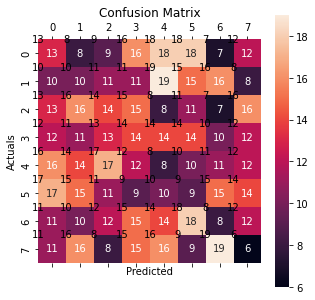


 test accuracy of the model 0.10237203495630462

 train accuracy of the model 0.6425697238795616
Learning rate set to 0.5
0:	learn: 2.0711928	total: 838ms	remaining: 1m 6s
1:	learn: 2.0543105	total: 1.59s	remaining: 1m 2s
2:	learn: 2.0511156	total: 2.29s	remaining: 58.7s
3:	learn: 2.0465051	total: 2.97s	remaining: 56.5s
4:	learn: 2.0351230	total: 3.69s	remaining: 55.3s
5:	learn: 2.0253076	total: 4.42s	remaining: 54.5s
6:	learn: 2.0146842	total: 5.16s	remaining: 53.8s
7:	learn: 2.0061055	total: 5.9s	remaining: 53.1s
8:	learn: 2.0007026	total: 6.6s	remaining: 52.1s
9:	learn: 1.9884869	total: 7.37s	remaining: 51.6s
10:	learn: 1.9784498	total: 8.13s	remaining: 51s
11:	learn: 1.9732832	total: 8.86s	remaining: 50.2s
12:	learn: 1.9586922	total: 9.6s	remaining: 49.5s
13:	learn: 1.9523500	total: 10.3s	remaining: 48.6s
14:	learn: 1.9420751	total: 11.1s	remaining: 47.9s
15:	learn: 1.9297818	total: 11.8s	remaining: 47.2s
16:	learn: 1.9147896	total: 12.5s	remaining: 46.5s
17:	learn: 1.9112352	tota

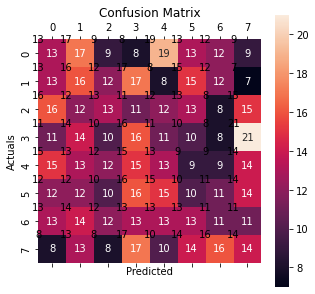


 test accuracy of the model 0.132334581772784

 train accuracy of the model 0.6220341334813376


In [ ]:
from catboost import CatBoostClassifier
import random
from sklearn.model_selection import GridSearchCV
sss = StratifiedShuffleSplit(n_splits=10, test_size = 0.1, random_state = None)
counter = 0
accuracy_score = []
for train_index, test_index in sss.split(df, Y) :
    counter += 1
    #print(train_index,test_index)
    X_train, X_test = df[train_index,:], df[test_index,:]
    Y_train, Y_test = Y[train_index], Y[test_index]
    #print(X_train.shape, Y_train.shape)
    rand_state_1 = random.randint(100, 999)
    rand_state_2 = random.randint(100, 999)
    parameters = {'depth'         : [4,8, 10],
                  'learning_rate' : [0.03],
                  'iterations'    : [50]
                 }
    
    catboost_classifier = CatBoostClassifier(iterations = 80)
    #grid_cv = GridSearchCV(estimator=catboost_classifier, param_grid = parameters)
    #grid_cv.fit(X_train, Y_train)
    catboost_classifier.fit(X_train,Y_train)
    
    
    y_test_predicted = catboost_classifier.predict(X_test)
    conf_matrix = confusion_matrix(Y_test, y_test_predicted)
    fig, ax = plt.subplots(figsize= (5,5))
    ax.matshow(conf_matrix, cmap = plt.cm.Oranges, alpha = 0.3)
    for i in range(conf_matrix.shape[0]) :
        for j in range(conf_matrix.shape[1]) :
            ax.text(x =j, y = i, s = conf_matrix[i, j], va ='center', ha = 'center')
    sns.heatmap(conf_matrix, annot = True)
    plt.xlabel('Predicted')
    plt.ylabel('Actuals')
    plt.title('Confusion Matrix')
    plt.show()
    
    #print(" Results from Grid Search " )
    #print("\n The best estimator :\n",grid_cv.best_estimator_)
    #print("\n The best score across ALL searched params:\n",grid_cv.best_score_)
    #print("\n The best parameters across ALL searched params:\n",grid_cv.best_params_)
    
    accuracy_score.append(catboost_classifier.score(X_test,Y_test))
    print("\n test accuracy of the model", catboost_classifier.score(X_test,Y_test) )
    print("\n train accuracy of the model", catboost_classifier.score(X_train,Y_train) )
    
    filename = 'D:\\Abhimanyu Singh\\2 knn experiement\\models\\combined\\cbc\\catboost\\classifier'+ str(counter) +'.sav'
    pickle.dump(catboost_classifier, open(filename, 'wb'))

print(mean(accuracy_score))  